# Project Title : Employee Salaries Prediction using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. employee_residence
2. company_location

## Ordinal
3. experience_level
4. employment_type
5. company_size
6. job_title
7. salary_currency
## DISCRETE: 
8. work_year
9. salary
10. salary_in_usd
11. remote_ratio

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.metrics import r2_score

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
import xgboost as xgb

In [14]:
df=pd.read_csv("ds_salaries.csv")


In [15]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [17]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [18]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [19]:
df.shape

(607, 12)

In [20]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [21]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


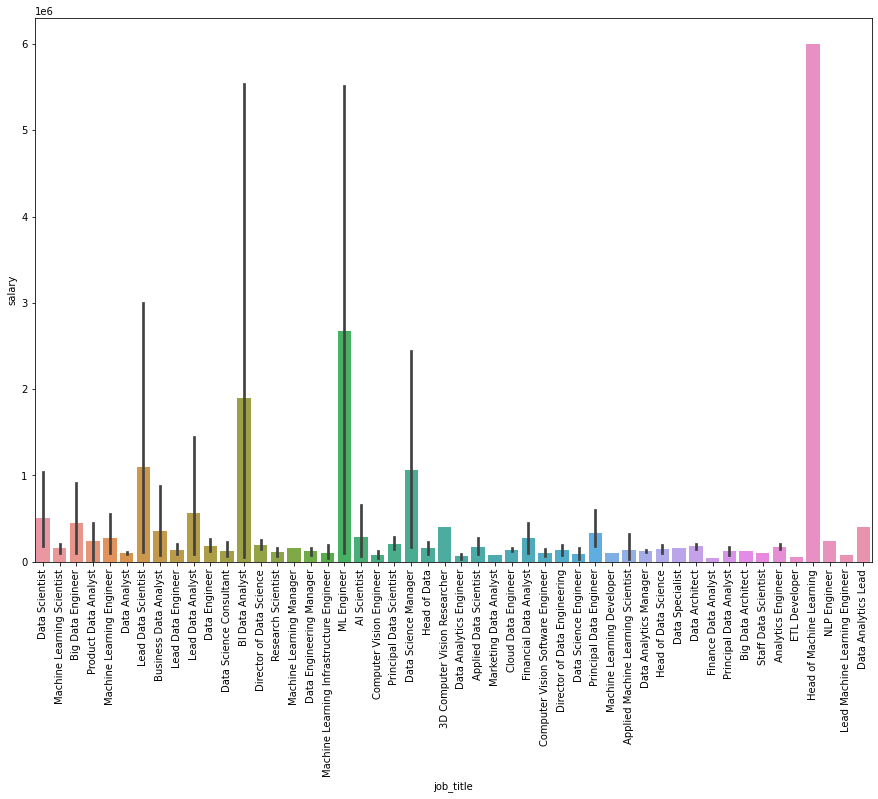

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['job_title'],y=df['salary'])
plt.xticks(rotation=90)
plt.show()

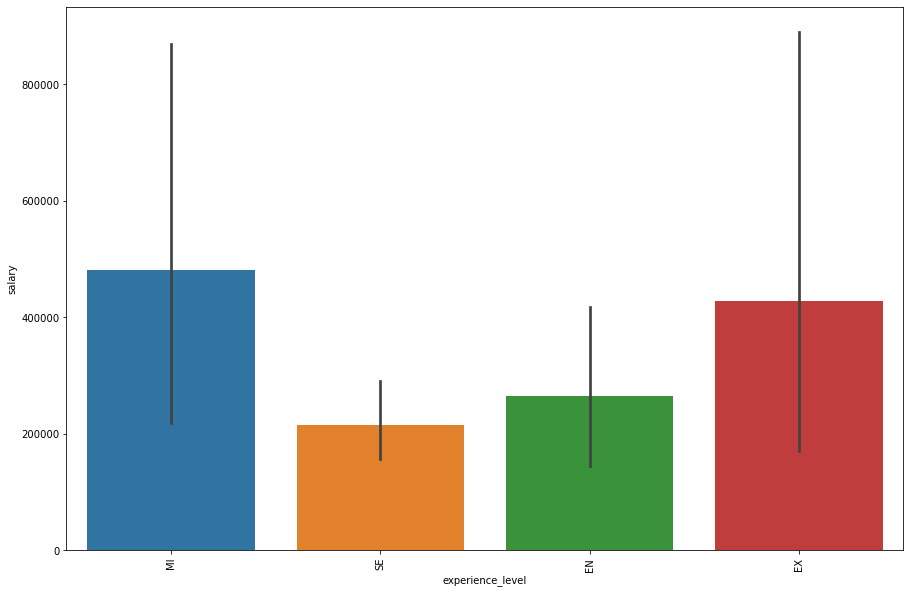

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['experience_level'],y=df['salary'])
plt.xticks(rotation=90)
plt.show()

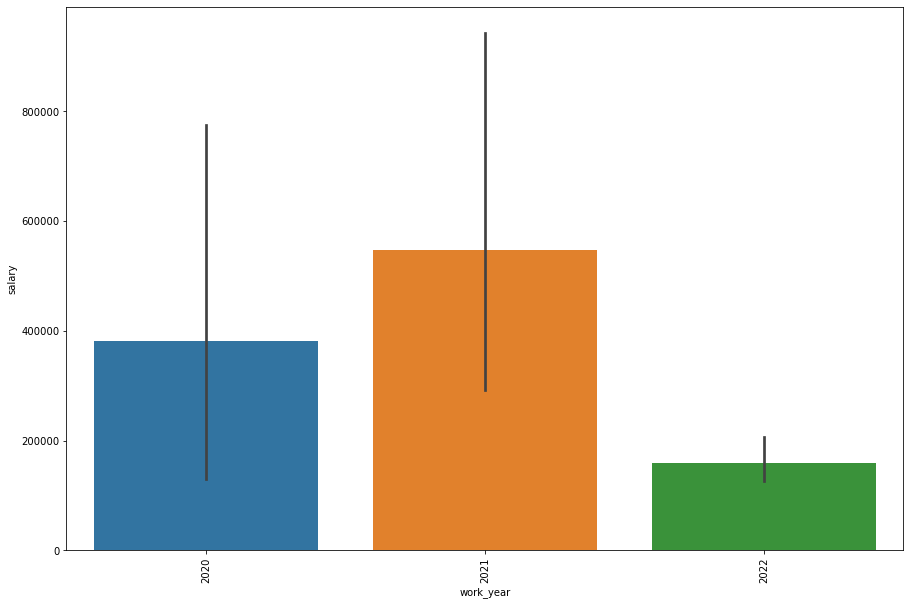

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['work_year'],y=df['salary'])
plt.xticks(rotation=90)
plt.show()

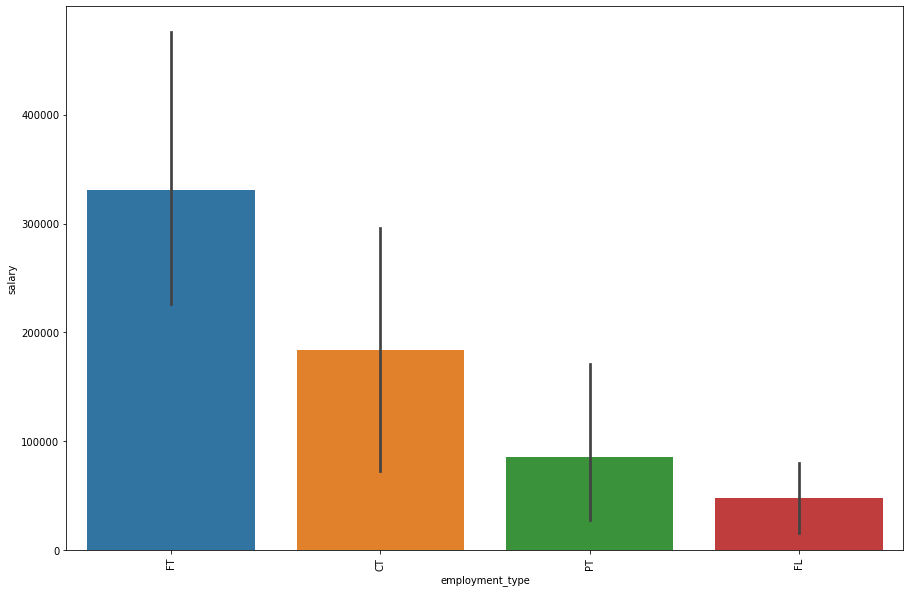

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['employment_type'],y=df['salary'])
plt.xticks(rotation=90)
plt.show()

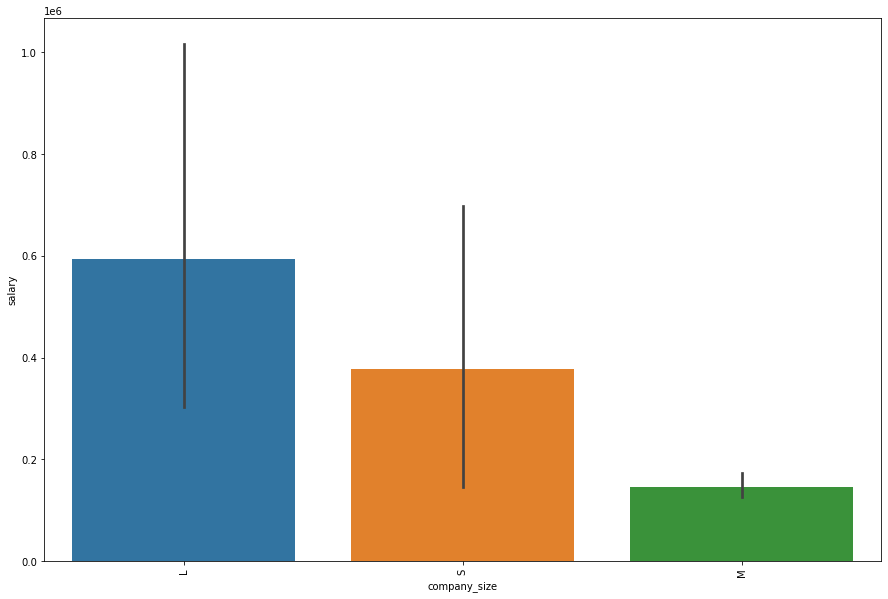

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['company_size'],y=df['salary'])
plt.xticks(rotation=90)
plt.show()

In [28]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [29]:
label_df=df.groupby(['job_title','experience_level'])['salary'].mean().sort_values(ascending=False).index


In [30]:
val_df=df.groupby(['job_title','experience_level'])['salary'].mean().sort_values(ascending=False).values


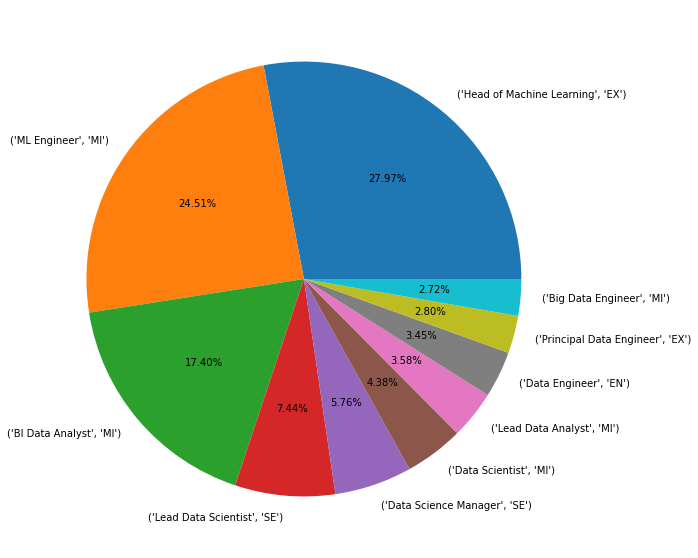

In [31]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()


In [32]:
label_df=df.groupby('job_title')['salary'].mean().sort_values(ascending=False).index


In [33]:
val_df=df.groupby('job_title')['salary'].mean().sort_values(ascending=False).values


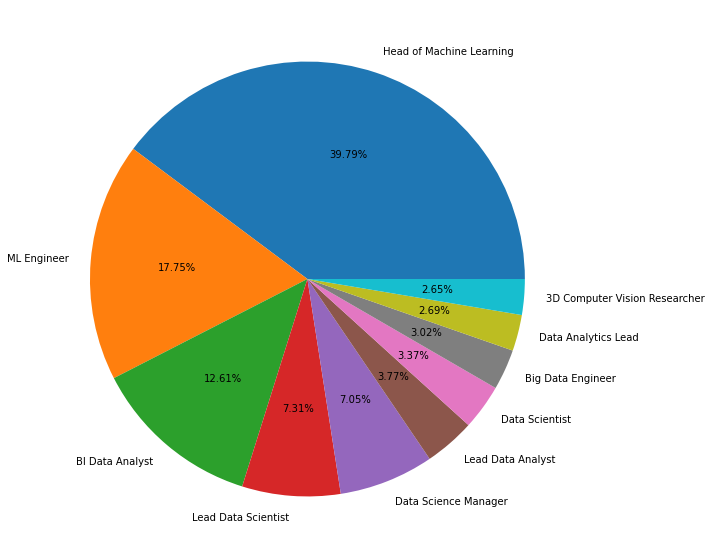

In [34]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [35]:
label_df=df.groupby(['job_title','experience_level'])['salary'].mean().sort_values(ascending=False).index


In [36]:
val_df=df.groupby(['job_title','experience_level'])['salary'].mean().sort_values(ascending=False).values


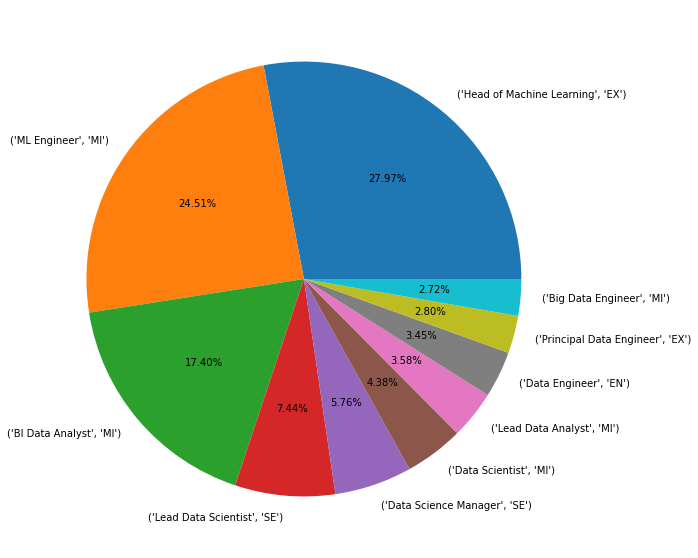

In [37]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

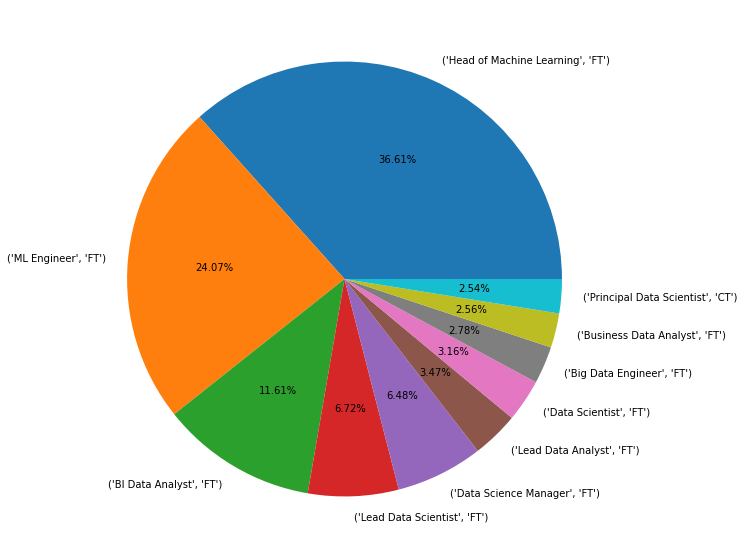

In [38]:
label_df=df.groupby(['job_title','employment_type'])['salary'].mean().sort_values(ascending=False).index


val_df=df.groupby(['job_title','employment_type'])['salary'].mean().sort_values(ascending=False).values

plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [39]:
label_df=df.groupby(['job_title','company_location'])['salary'].mean().sort_values(ascending=False).index


In [40]:
val_df=df.groupby(['job_title','company_location'])['salary'].mean().sort_values(ascending=False).values


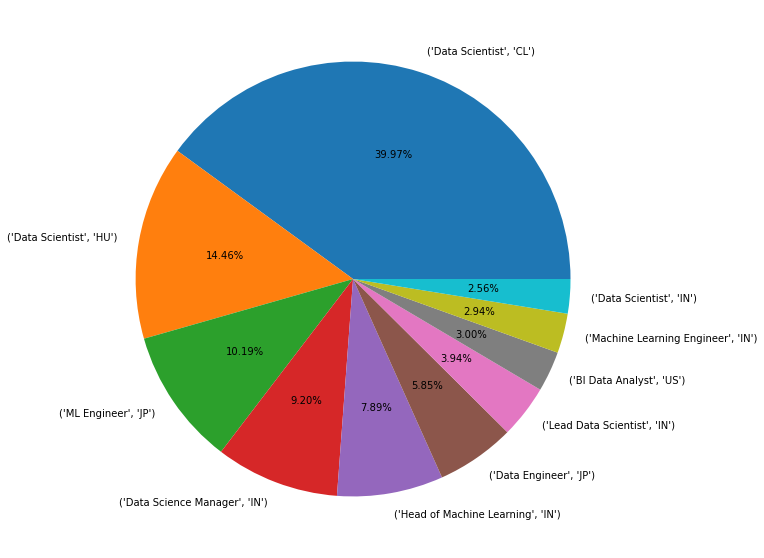

In [41]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

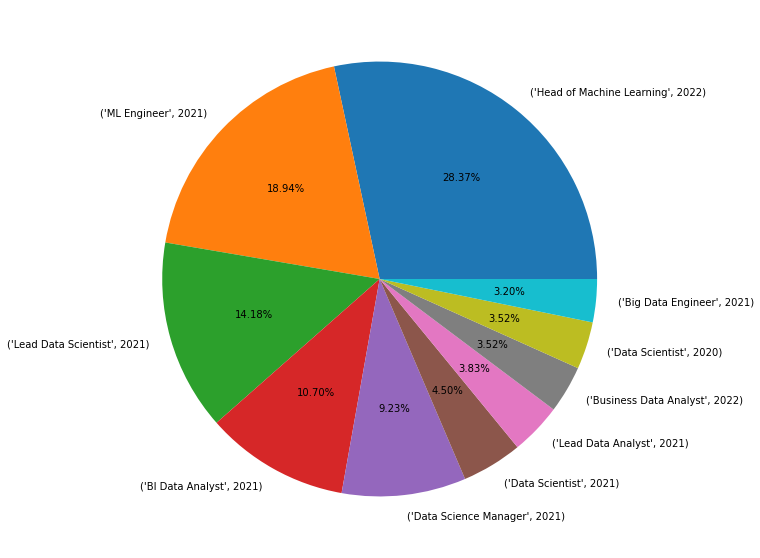

In [42]:
label_df=df.groupby(['job_title','work_year'])['salary'].mean().sort_values(ascending=False).index


val_df=df.groupby(['job_title','work_year'])['salary'].mean().sort_values(ascending=False).values

plt.figure(figsize=(10,10))

plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [43]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [44]:
label_df=df.groupby(['job_title','company_size'])['salary'].mean().sort_values(ascending=False).index


In [45]:
val_df=df.groupby(['job_title','company_size'])['salary'].mean().sort_values(ascending=False).values


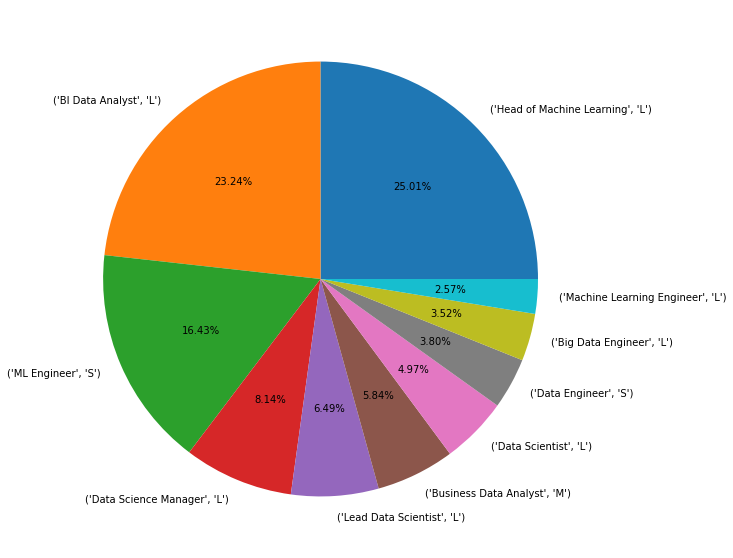

In [46]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [47]:
label_df=df.groupby(['job_title','company_size','work_year'])['salary'].mean().sort_values(ascending=False).index


In [48]:
val_df=df.groupby(['job_title','company_size','work_year'])['salary'].mean().sort_values(ascending=False).values


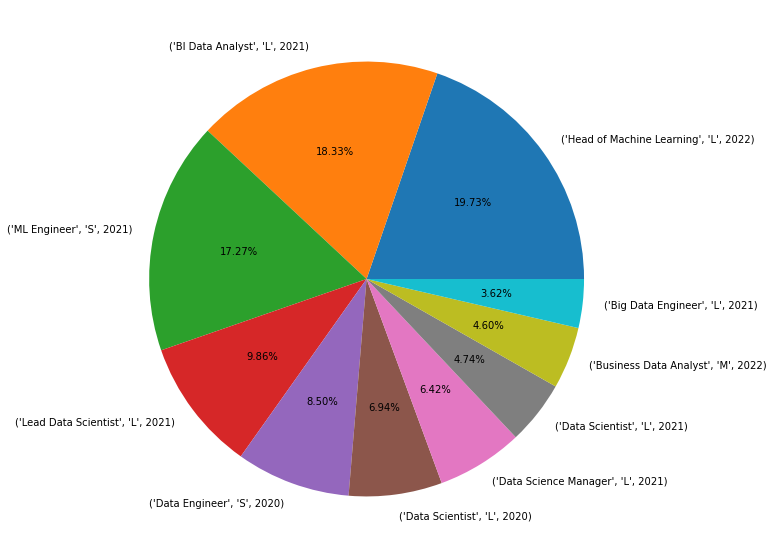

In [49]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [50]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [51]:
label_df=df.groupby(['job_title','employee_residence'])['salary'].mean().sort_values(ascending=False).index


In [52]:
val_df=df.groupby(['job_title','employee_residence'])['salary'].mean().sort_values(ascending=False).values


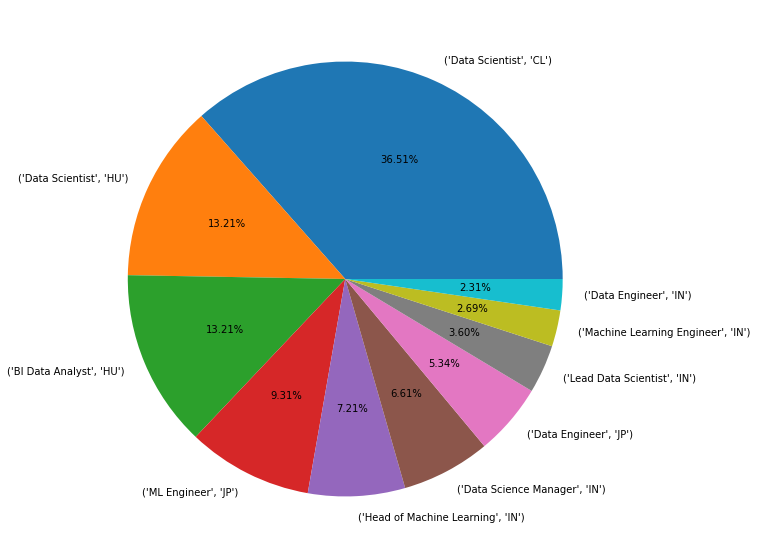

In [53]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [54]:
label_df=df.groupby(['job_title','employee_residence','company_size'])['salary'].mean().sort_values(ascending=False).index


In [55]:
val_df=df.groupby(['job_title','employee_residence','company_size'])['salary'].mean().sort_values(ascending=False).values


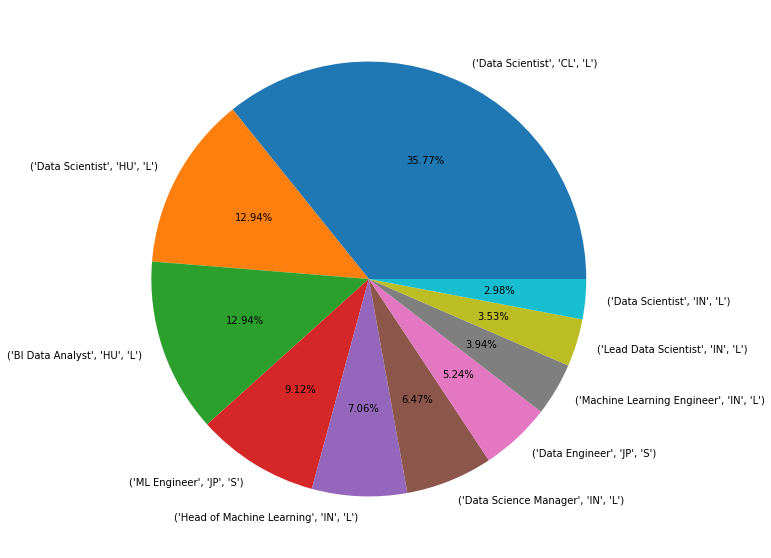

In [56]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [57]:
Machine_Learning_Scientist_df=df.groupby('job_title').get_group('Machine Learning Scientist')


In [58]:
Machine_Learning_Scientist_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
115,2021,EN,FT,Machine Learning Scientist,225000,USD,225000,US,100,US,L
126,2021,SE,FT,Machine Learning Scientist,120000,USD,120000,US,50,US,S
184,2021,MI,FL,Machine Learning Scientist,12000,USD,12000,PK,50,PK,M
224,2021,SE,FT,Machine Learning Scientist,225000,USD,225000,US,100,CA,L
419,2022,MI,FT,Machine Learning Scientist,160000,USD,160000,US,100,US,L
420,2022,MI,FT,Machine Learning Scientist,112300,USD,112300,US,100,US,L
495,2022,MI,FT,Machine Learning Scientist,153000,USD,153000,US,50,US,M


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='employee_residence', ylabel='count'>

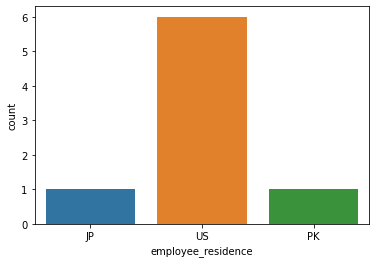

In [59]:
sns.countplot(Machine_Learning_Scientist_df['employee_residence'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_location', ylabel='count'>

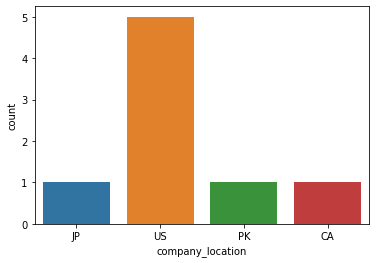

In [60]:
sns.countplot(Machine_Learning_Scientist_df['company_location'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_size', ylabel='count'>

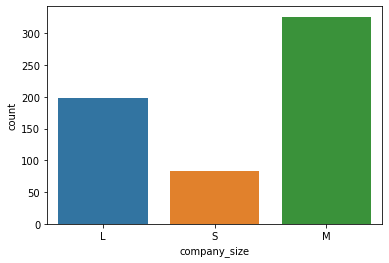

In [61]:
sns.countplot(df['company_size'])

In [62]:
Machine_Learning_Scientist_df['salary'].mean()

158412.5

In [63]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [64]:
label_df=df.groupby('experience_level')['salary'].mean().sort_values(ascending=False).index


In [65]:
val_df=df.groupby('experience_level')['salary'].mean().sort_values(ascending=False).values


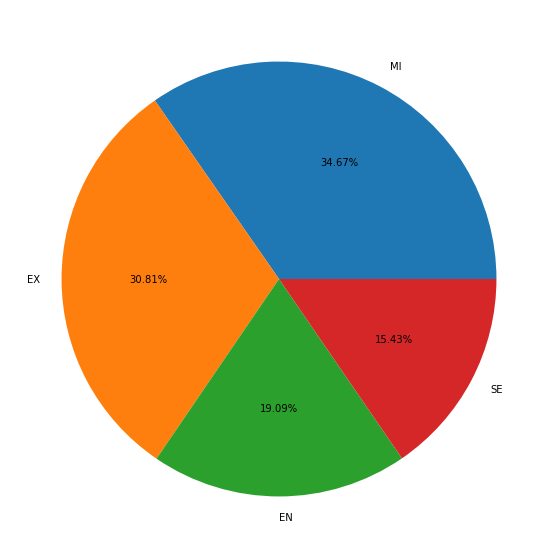

In [66]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='experience_level'>

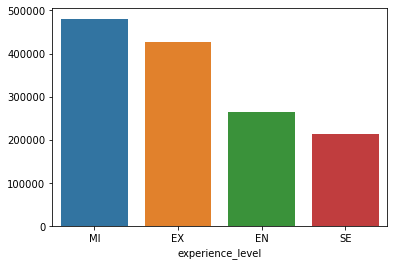

In [67]:
sns.barplot(x=label_df,y=val_df)

In [68]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

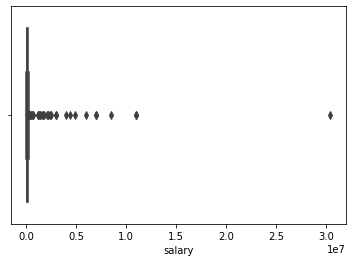

In [69]:
sns.boxplot(df['salary'])

In [70]:
q1=df['salary'].quantile(0.25)

In [71]:
q3=df['salary'].quantile(0.75)

In [72]:
IQR=q3-q1

In [73]:
lower=q1-1.5*IQR

In [74]:
upper=q3+1.5*IQR

In [75]:
df=df[(df['salary']>lower) & (df['salary']<upper)]

In [76]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


<AxesSubplot:>

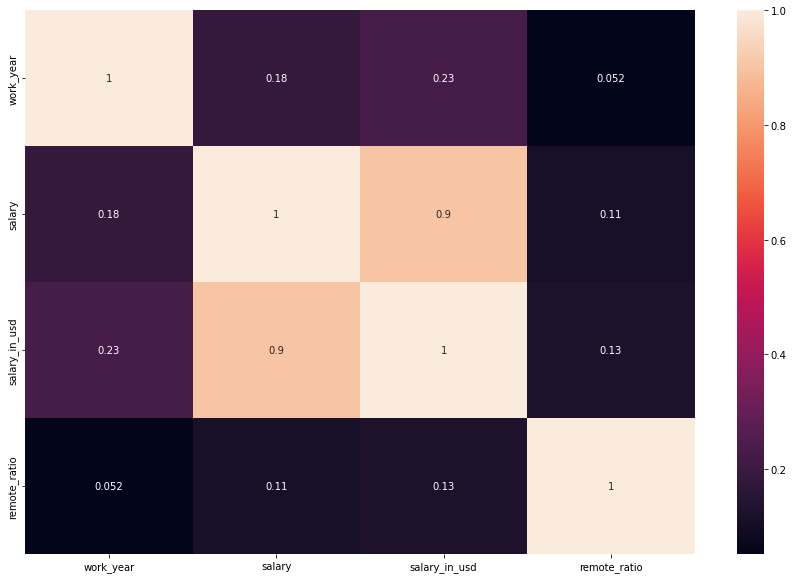

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


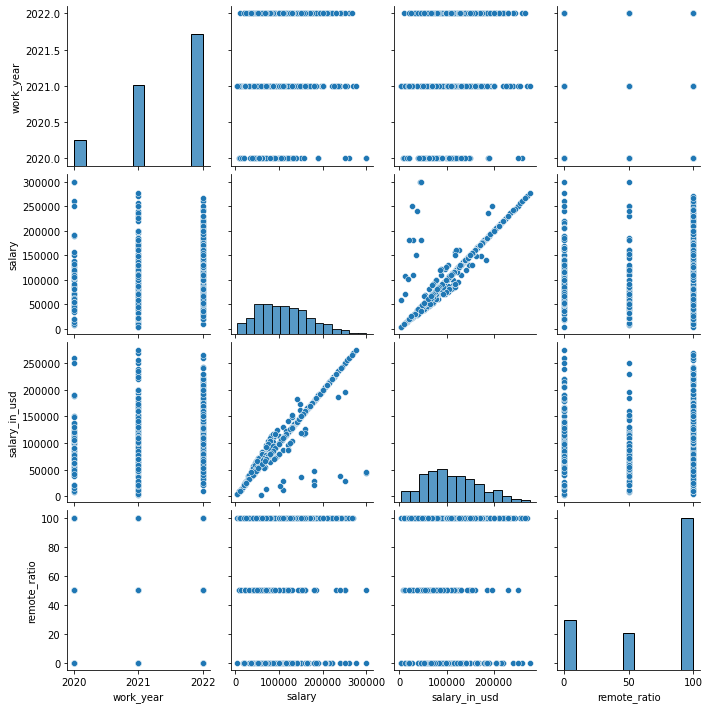

In [78]:
sns.pairplot(df)

In [79]:
le=LabelEncoder()


In [80]:
df['experience_level']=le.fit_transform(df['experience_level'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_19044\1488615864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience_level']=le.fit_transform(df['experience_level'])


In [81]:
df['employment_type']=le.fit_transform(df['employment_type'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19044\4041761586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employment_type']=le.fit_transform(df['employment_type'])


In [82]:
df['job_title']=le.fit_transform(df['job_title'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19044\3451985784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title']=le.fit_transform(df['job_title'])


In [83]:
df['salary_currency']=le.fit_transform(df['salary_currency'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19044\3390442873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_currency']=le.fit_transform(df['salary_currency'])


In [84]:
df['employee_residence']=le.fit_transform(df['employee_residence'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19044\3420370653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employee_residence']=le.fit_transform(df['employee_residence'])


In [85]:
df['company_location']=le.fit_transform(df['company_location'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19044\1140880334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_location']=le.fit_transform(df['company_location'])


In [86]:
df['company_size']=le.fit_transform(df['company_size'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_19044\4221945834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_size']=le.fit_transform(df['company_size'])


In [87]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,20,70000,6,79833,13,0,10,0
1,2020,3,2,38,260000,12,260000,30,0,26,2
2,2020,3,2,6,85000,7,109024,19,50,16,1
3,2020,2,2,44,20000,12,20000,22,0,18,2
4,2020,3,2,35,150000,12,150000,53,50,45,0
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,3,2,15,154000,12,154000,53,100,45,1
603,2022,3,2,15,126000,12,126000,53,100,45,1
604,2022,3,2,11,129000,12,129000,53,0,45,1
605,2022,3,2,11,150000,12,150000,53,100,45,1


In [88]:
y=df['salary_in_usd']

In [89]:
X=df.drop('salary_in_usd',axis=1)

In [90]:
sc=StandardScaler()


In [91]:
X=sc.fit_transform(X)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [93]:
lr=LinearRegression()


In [94]:
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred=lr.predict(X_test)


In [96]:
r2_score(y_test,y_pred)

0.9325706295416918

In [97]:
dtr=DecisionTreeRegressor()


In [98]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [99]:
y_pred=dtr.predict(X_test)


In [100]:
r2_score(y_test,y_pred)

0.9274844183090062

In [101]:
rfr=RandomForestRegressor()


In [102]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
y_pred=rfr.predict(X_test)


In [104]:
r2_score(y_test,y_pred)

0.9726834548624421

In [105]:
knr=KNeighborsRegressor()


In [106]:
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [107]:
y_pred=knr.predict(X_test)


In [108]:
r2_score(y_test,y_pred)

0.8192548910411701

In [109]:
xgb_i=xgb.XGBRegressor()


In [110]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [111]:
y_pred=xgb_i.predict(X_test)


In [112]:
r2_score(y_test,y_pred)

0.9770247267737755